# [[데이콘]와인 품질 분류](https://dacon.io/competitions/open/235610/overview/description)

와인 성분 데이터


1. train.csv / test.csv
- index 구분자
- quality 품질(**y**)
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

2.  submission.csv (제출 파일 형식)

※ [데이터 출처](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

### step1. 패키지 및 데이터 불러오기

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic')
plt.style.use('seaborn-white')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('dacondata/train_wine.csv')
test = pd.read_csv('dacondata/test_wine.csv')
submission = pd.read_csv('dacondata/sample_submission_wine.csv')

In [7]:
print(train.head())
print(train.shape)

   index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol   type  
0  0.99432  3.44       0.44     10.2  white  
1  0.99690  3.19       0.59      9.5    red  
2  0.991

In [8]:
print(test.head())
print(test.shape)

   index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0            9.0              0.31         0.48             6.6   
1      1           13.3              0.43         0.58             1.9   
2      2            6.5              0.28         0.27             5.2   
3      3            7.2              0.15         0.39             1.8   
4      4            6.8              0.26         0.26             2.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.043                 11.0                  73.0  0.99380  2.90   
1      0.070                 15.0                  40.0  1.00040  3.06   
2      0.040                 44.0                 179.0  0.99480  3.19   
3      0.043                 21.0                 159.0  0.99480  3.52   
4      0.019                 23.5                  72.0  0.99041  3.16   

   sulphates  alcohol   type  
0       0.38     11.6  white  
1       0.49      9.0    red  
2       0.69     

In [5]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [11]:
train.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [44]:
train.iloc[:, 1:].describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### step2. EDA

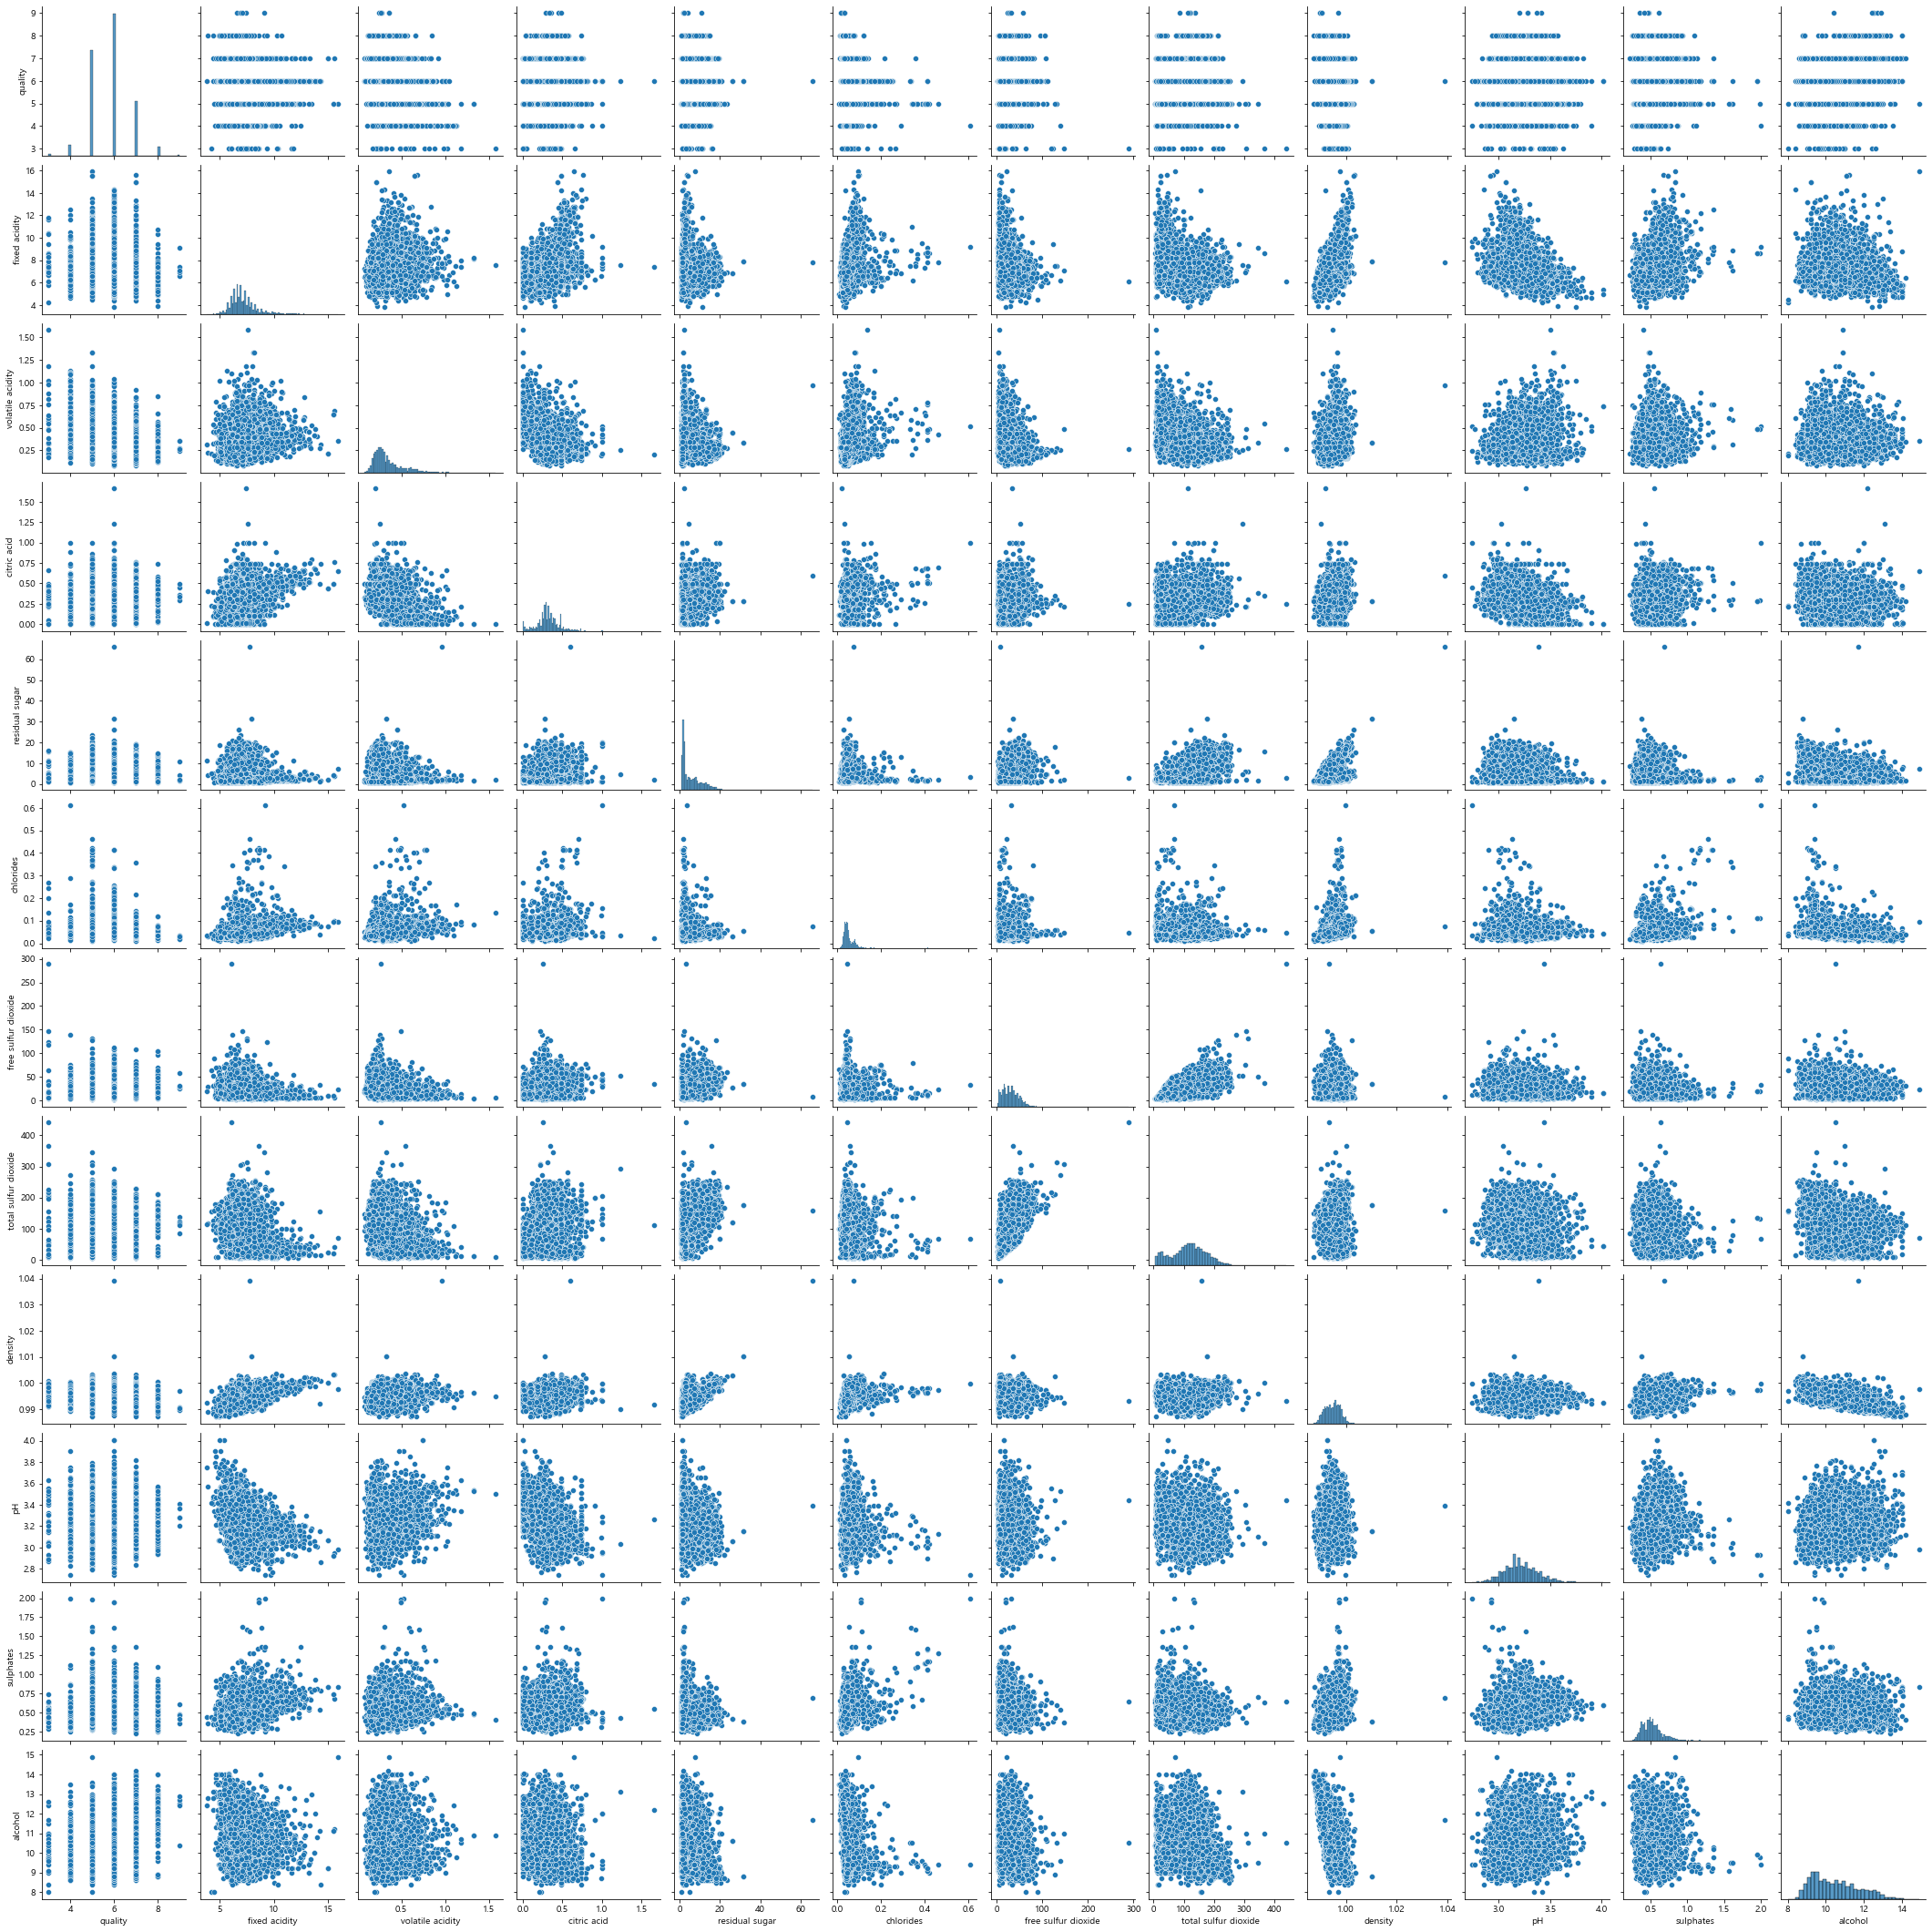

In [16]:
# sns.pairplot(data = train.iloc[:, 1:])
# plt.show()

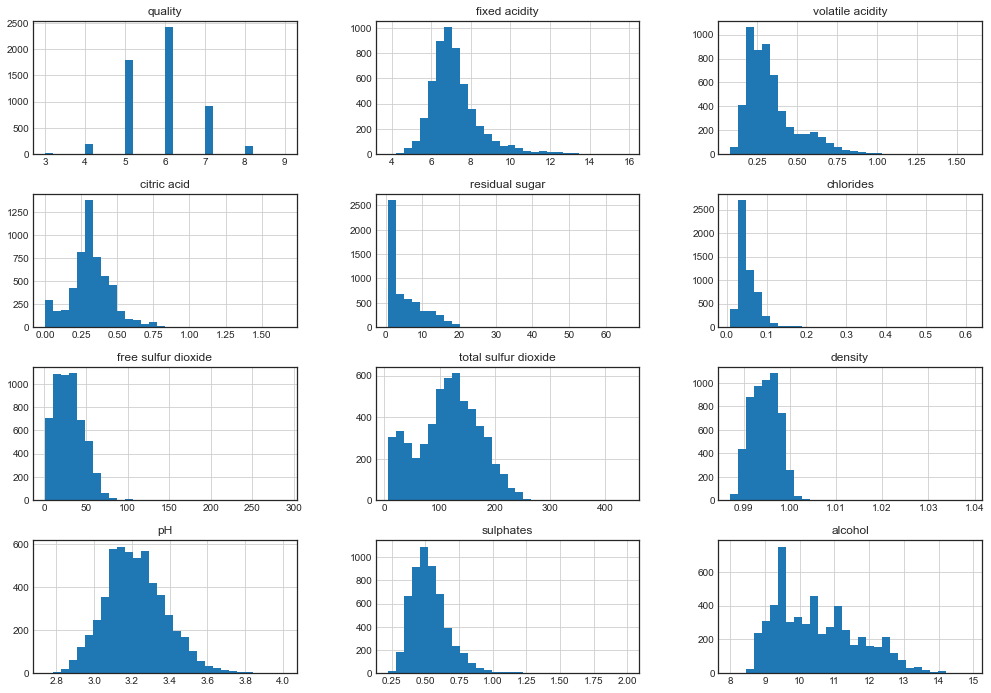

In [38]:
# 각 변수의 분포 확인
train.iloc[:, 1:].hist(bins = 30, figsize = (17, 12))
plt.show()

<ipython-input-32-375b6a013a64>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


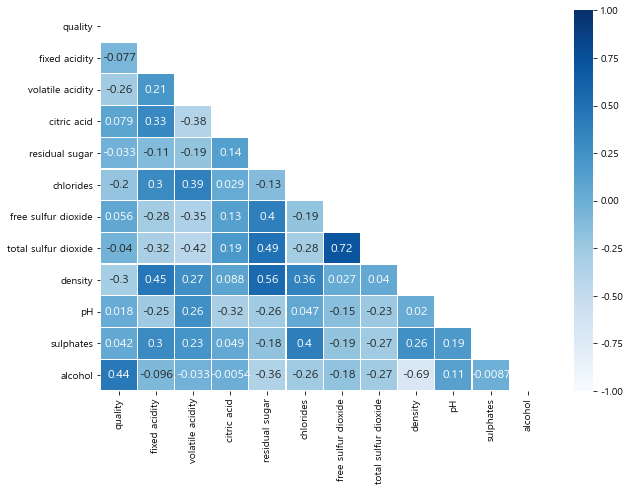

In [32]:
# 각 변수 간 상관관계 확인(id 변수 제외)
corr_df = train.iloc[:, 1:].corr(method='pearson')

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 7))
sns.heatmap(data = corr_df, cmap='Blues', mask=mask,
            annot = True, annot_kws={'size' : 12}, linecolor='white', linewidths=.2,
           vmin = -1,vmax = 1 # 컬러바 범위 -1 ~ 1
           )
plt.show()

- total sulfur dioxide 총 이산화황 ~ free sulfur dioxide 독립 이산화황  
- density 밀도 ~ alcohol 도수  
총 두 쌍의 변수가 상대적으로 높은 상관관계를 보인다.

품질과 상대적으로 높은 상관성을 보이는 변수는 **alcohol 도수** 라고 할 수 있지만 상관계수가 0.44로 약한 양의 상관관계를 보인다.

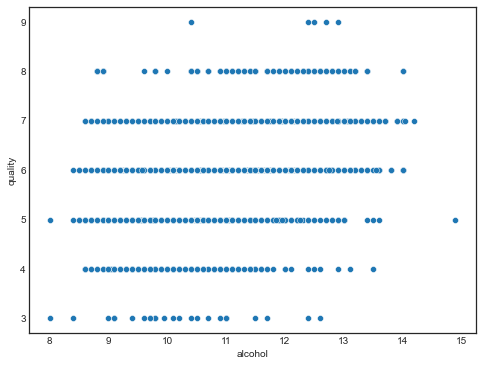

In [43]:
# 품질과 도수 산점도
plt.figure(figsize=(8, 6))
sns.scatterplot(data = train, x = 'alcohol', y='quality')
plt.show()

### step3. 분류 모델 생성

In [89]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import multiprocessing

In [69]:
# type 변수가 범주형 변수이므로 더미 변수로 만든다.
dummy_train = pd.get_dummies(train)
dummy_train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1


In [70]:
# X, y 분류
train.head()
X = dummy_train.iloc[:, 2:]
y = dummy_train['quality']

In [72]:
X.head(), y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            5.6             0.695         0.06             6.8      0.042   
 1            8.8             0.610         0.14             2.4      0.067   
 2            7.9             0.210         0.39             2.0      0.057   
 3            7.0             0.210         0.31             6.0      0.046   
 4            7.8             0.400         0.26             9.5      0.059   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                  9.0                  84.0  0.99432  3.44       0.44   
 1                 10.0                  42.0  0.99690  3.19       0.59   
 2                 21.0                 138.0  0.99176  3.05       0.52   
 3                 29.0                 108.0  0.99390  3.26       0.50   
 4                 32.0                 178.0  0.99550  3.04       0.43   
 
    alcohol  type_red  type_white  
 0     10.2         0           1  


### step 4. 모델 생성
#### 1) SVC
SVC의 목표는 마진이 가장 큰 결정경계를 찾는 것이다.

[파라미터 설명 참고](https://bskyvision.com/163)

In [77]:
# 모델 생성 및 점수 확인
svc_model = SVC()
svc_model.fit(X, y)

pred = svc_model.predict(X)

print('학습 데이터 점수: {:0.3f}'.format(accuracy_score(y, pred)))

학습 데이터 평가: 0.442


생성한 모델을 이용해 학습 데이터를 평가한 결과, 약 0.442로 낮은 점수임을 알 수 있다.  
정규화 또는 표준화를 해서 다시 평가해 본다.

In [82]:
# 표준화
stand_scaler = StandardScaler()
X_scaler1 = stand_scaler.fit_transform(X)

stand_svc_model = SVC()
stand_svc_model.fit(X_scaler1, y)

pred_scaler1 = stand_svc_model.predict(X_scaler1)

print('표준화 학습 데이터 점수: {:0.3f}'.format(accuracy_score(y, pred_scaler1)))

# 정규화
mm_scaler = MinMaxScaler()
X_scaler2 = mm_scaler.fit_transform(X)

mm_svc_model = SVC()
mm_svc_model.fit(X_scaler2, y)

pred_scaler2 = mm_svc_model.predict(X_scaler2)

print('정규화 학습 데이터 점수: {:0.3f}'.format(accuracy_score(y, pred_scaler2)))

표준화 학습 데이터 평가: 0.603
정규화 학습 데이터 평가: 0.546


표준화, 정규화한 데이터 각각 평가한 결과, 표준화한 데이터의 학습 점수가 0.603으로 더 높음.

In [96]:
# 교차 검증
scores = cross_val_score(estimator=stand_svc_model, 
                         X = X_scaler1, y = y, scoring='accuracy', cv = 5, 
                         n_jobs=multiprocessing.cpu_count())
scores

array([0.56636364, 0.57636364, 0.5677889 , 0.56505914, 0.56414923])

In [ ]:
# GridSearchCV: 교차 검증과 하이퍼 파라미터 튜닝을 동시에 수행
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC())])
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], # 값이 클수록 결정 경계의 곡률이 커짐 -> 오버피팅
             'C': [0.001, 0.01, 0.1, 1, 10, 100], # 값이 클수록 이상치의 존재 가능성을 작게 봐서 좀 더 세심하게 결정 경계를 찾아낸다. -> 오버피팅(하드마진)
             'kernel': ['rbf', 'ploy', 'sigmoid'] # 가장 성능이 좋은 것: 가우시안 RBF 커널
             }
grid = GridSearchCV(estimator=stand_svc_model, 
                    param_grid=param_grid, scoring='accuracy', cv = 5, 
                    n_jobs=multiprocessing.cpu_count(),
                   verbose=True)

grid.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
grid.best.esti